# HousePrice-Prediction with Regression Techniques
## About
Data-Source: [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

In [1]:
# imports
import os
import pandas as pd
import numpy as np
import sklearn
%matplotlib inline
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, skew
sns.set()

# load data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

First quick look on the data:

In [2]:
print("Size Training: %d, Size test: %d" %(len(train_df), len(test_df)))
print(train_df.head(3))

Size Training: 1460, Size test: 1459
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  

[3 rows x 81 columns]


## Data preparation

### Target Variable

Interpreting and evaluating the model will be easier if the target variable is normally distributed. Thus I will check whether this is fulfilled by plotting its distribution and the QQ-Plot. Findings:
* The first plot shows that the data is right skewed
* The QQ-Plot confirms that the data is not normally distributed.


/home/dennis/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


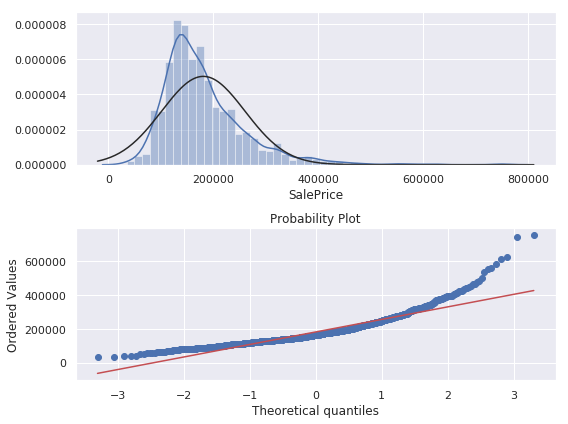

In [14]:
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

sns.distplot(train_df['SalePrice'], fit=norm, ax=ax1)

res = stats.probplot(train_df['SalePrice'], plot=ax2)
fig.tight_layout()
plt.show()

To solve this, I will apply the log-log-transformation on the target variable.
As a result, one can see that the distribution of the SalesPrices appears more  

/home/dennis/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


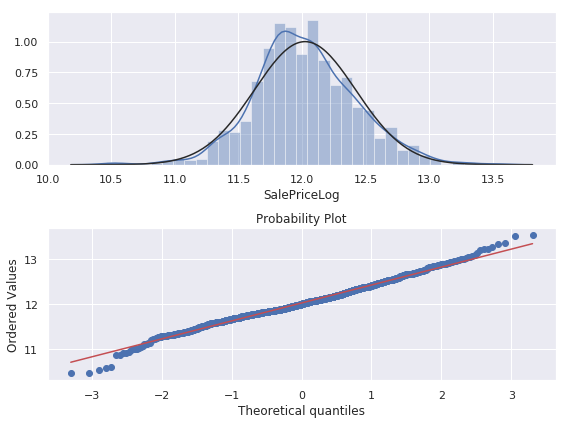

In [4]:
# use log to transform the dependent variable
train_df['SalePriceLog'] = np.log1p(train_df['SalePrice'])

fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

sns.distplot(train_df['SalePriceLog'], fit=norm, ax=ax1)

res = stats.probplot(train_df['SalePriceLog'], plot=ax2)
fig.tight_layout()
plt.show()